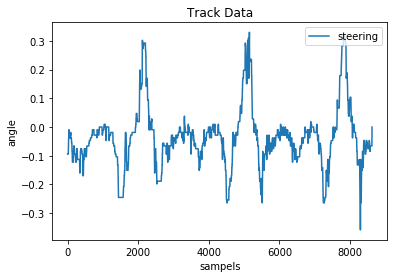

(8624, 8)


In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

# read csv
def get_csv(path):
    # load CSV & drop zeros
    df = pd.read_csv(path+'driving_log.csv')
    #df = df.drop(df[df['steering'] == 0.].index)
    df = df.drop(df[df['speed'] < 1.].index)
    df['center'] = path+df['center']
    df['right'] = path+df['right']
    df['left'] = path+df['left']
    return df

tracks = [#get_csv(path = './andy_track1_offroad/'),\
          #get_csv(path = './data/'),\
          #get_csv(path = './peters_drive/'),\
          #get_csv(path = './andy_track1_backward/'),\
          #get_csv(path = './andy_track1_forward/'),\
          #get_csv(path = './andy_track1_exact_drive/'),\
          get_csv(path = './andy_track1_exact_drive2/'),\
         ]
df = pd.concat(tracks).reset_index()

def plot_steering(df):
    ### plot 
    plt.plot(df['steering'])
    plt.title('Track Data')
    plt.ylabel('angle')
    plt.xlabel('sampels')
    plt.legend(['steering'], loc='upper right')
    #plt.yscale('log')
    plt.show()
    
plot_steering(df)
print(df.shape)

In [2]:
# split data

from sklearn.model_selection import train_test_split
df_train, df_val = train_test_split(df, test_size=1/21, random_state=42)

In [3]:
# argumentation and batching parameters:

image_shape = (160,320,3) #cv2.imread( df['center'][df['center'].index[0]]).shape
batch_size_single = 50

steering_argumentation_offset = .25
steering_argumentation_scale = 1.15

# generate argumentated batch

#from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.utils import shuffle
import traceback
import sys

def get_batch(df,batch_size_single): 
    n_split = int(len(df)//batch_size_single)-1
    batch_idx = (df[:batch_size_single*n_split].index.values)   
    batch_idx = shuffle(batch_idx)
    batch_idx = batch_idx.reshape(n_split,batch_size_single,)
    while 1:
        batch_y            = np.empty(list([batch_size_single*6]))
        batch_x            = np.empty(list([batch_size_single*6]) + list(image_shape))
        #print('\r\nget_batch: start ',flush=True)
        cnt = 0
        for idxes in batch_idx:
            try:
                idx_b = 0
                for idx in idxes:
                    batch_y[0+idx_b]      =  (steering_argumentation_scale*df['steering'][idx] + steering_argumentation_offset) 
                    batch_y[1+idx_b]      = -(steering_argumentation_scale*df['steering'][idx] + steering_argumentation_offset) 
                    batch_y[2+idx_b]      =  (steering_argumentation_scale*df['steering'][idx] - steering_argumentation_offset) 
                    batch_y[3+idx_b]      = -(steering_argumentation_scale*df['steering'][idx] - steering_argumentation_offset) 
                    batch_y[4+idx_b]      =  (df['steering'][idx]) 
                    batch_y[5+idx_b]      = -(df['steering'][idx]) 
                    batch_x[0+idx_b]      = cv2.imread(df['left'][idx].replace(" ", "").replace("\\", "/")) 
                    batch_x[1+idx_b]      = cv2.imread(df['left'][idx].replace(" ", "").replace("\\", "/"))[:,-1::-1]
                    batch_x[2+idx_b]      = cv2.imread(df['right'][idx].replace(" ", "").replace("\\", "/"))  
                    batch_x[3+idx_b]      = cv2.imread(df['right'][idx].replace(" ", "").replace("\\", "/"))[:,-1::-1]
                    batch_x[4+idx_b]      = cv2.imread(df['center'][idx].replace(" ", "").replace("\\", "/"))  
                    batch_x[5+idx_b]      = cv2.imread(df['center'][idx].replace(" ", "").replace("\\", "/"))[:,-1::-1]
                    idx_b += 6
                assert(not(np.isnan((np.sum(batch_x))))), 'is nan'
                assert(not(np.isnan((np.sum(batch_y))))), 'is nan'
                #yield (batch_x,batch_y)
                cnt +=1
                #print(' yield ',cnt, end='\r',flush=True)
                yield shuffle(batch_x,batch_y) 
            except:
                print("\r\n\r\nUnexpected error: {} \r\n\r\n".format(sys.exc_info()[0]))
                raise


train_generator = get_batch(df_train, batch_size_single=batch_size_single)
validation_generator = get_batch(df_val, batch_size_single=batch_size_single)

(300, 160, 320, 3)


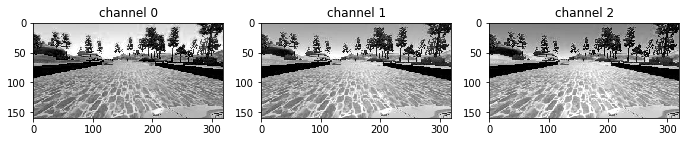

steering: 0.2608490563, idx: 0


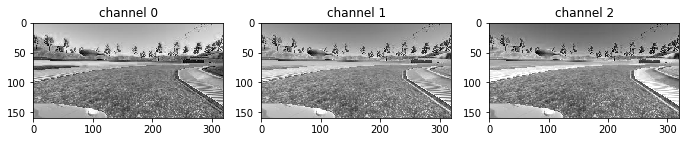

steering: 0.07547173499999998, idx: 5


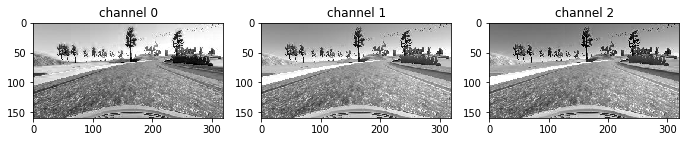

steering: 0.10377360000000001, idx: 10


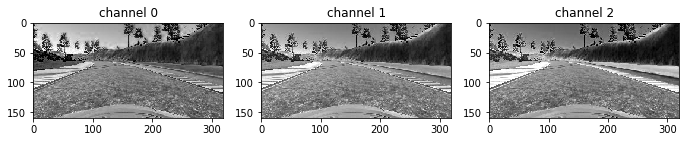

steering: -0.1226415, idx: 15


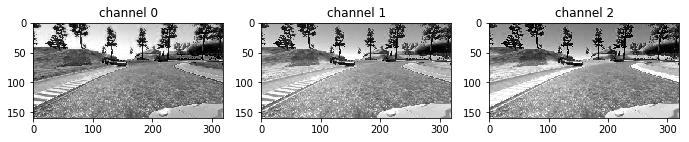

steering: 0.3584905745, idx: 20


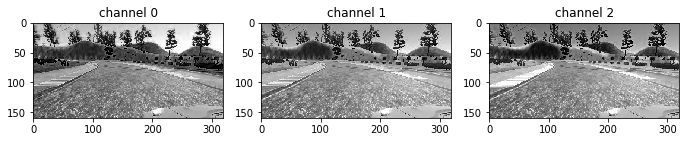

steering: 0.07641509000000002, idx: 25


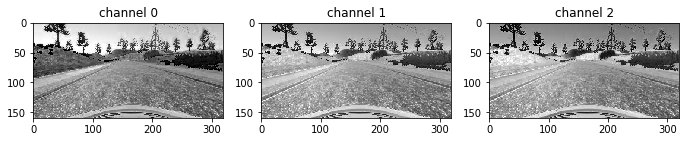

steering: -0.0754717, idx: 30


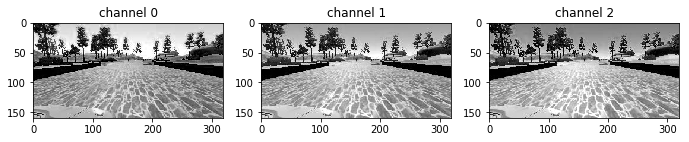

steering: -0.2608490563, idx: 35


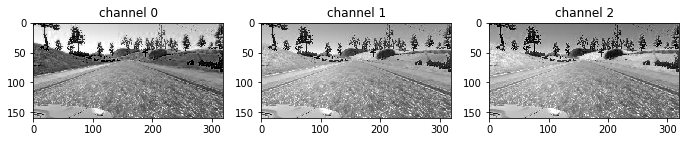

steering: -0.2174528265, idx: 40


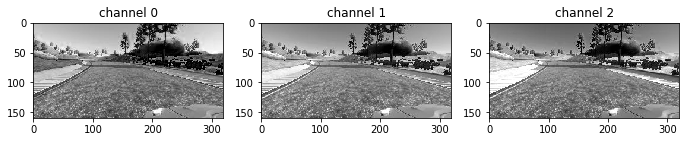

steering: 0.108962275, idx: 45


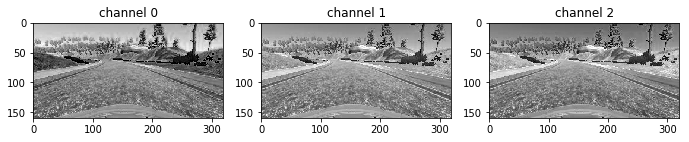

steering: -0.04716982, idx: 50


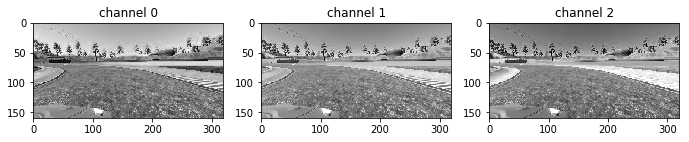

steering: -0.575471735, idx: 55


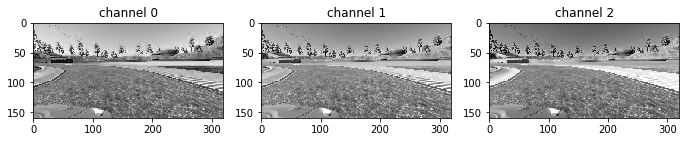

steering: -0.575471735, idx: 60


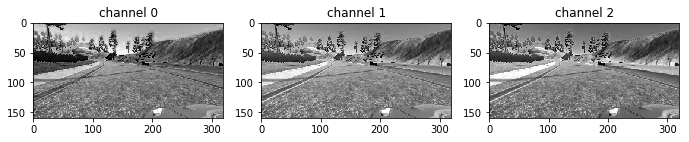

steering: 0.1415094255, idx: 65


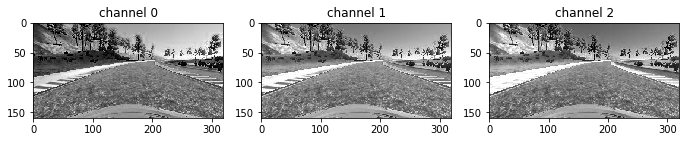

steering: 0.05660377, idx: 70


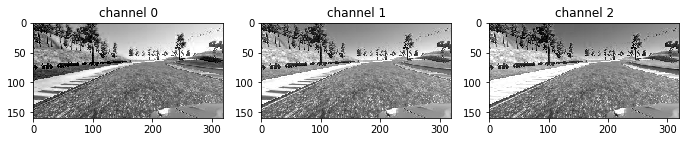

steering: 0.391037725, idx: 75


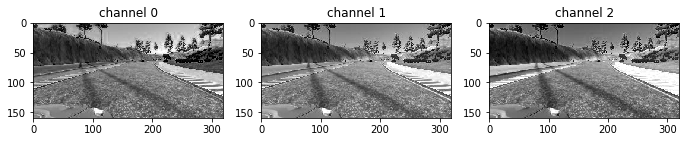

steering: -0.1415094255, idx: 80


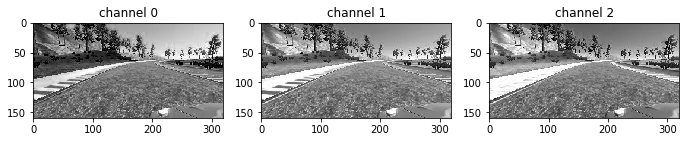

steering: 0.3150943355, idx: 85


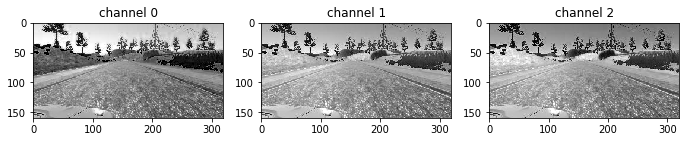

steering: -0.336792455, idx: 90


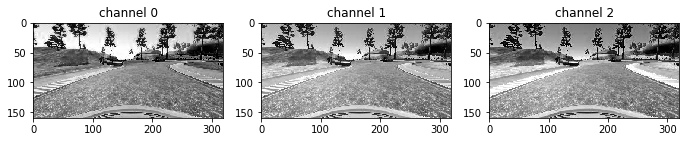

steering: 0.09433963, idx: 95


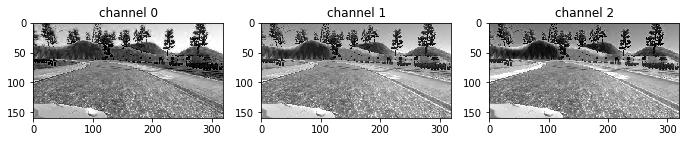

steering: -0.42358491, idx: 100


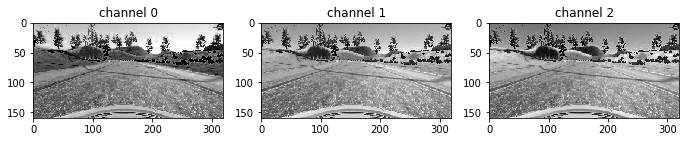

steering: -0.02830189, idx: 105


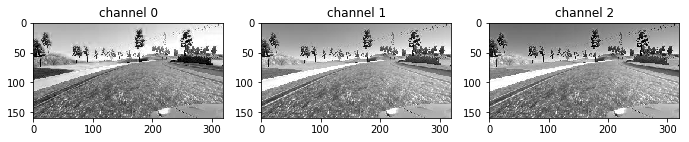

steering: 0.44528299499999996, idx: 110


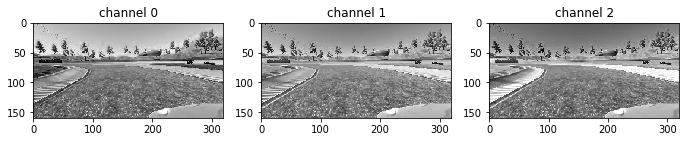

steering: 0.022169820000000007, idx: 115


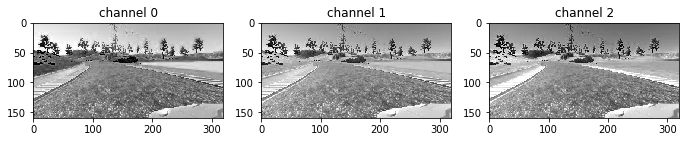

steering: -0.021226464999999972, idx: 120


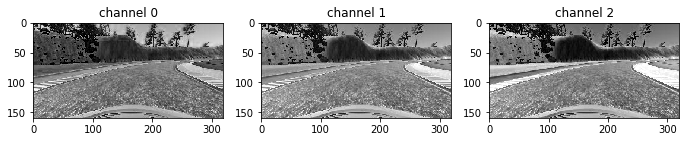

steering: 0.1886793, idx: 125


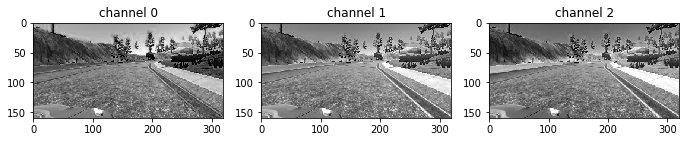

steering: -0.174056599, idx: 130


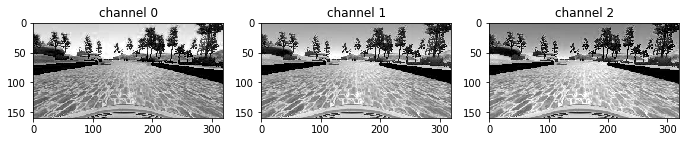

steering: 0.009433961999999999, idx: 135


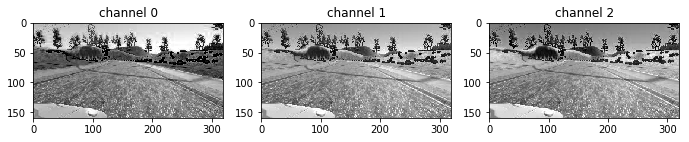

steering: -0.2825471735, idx: 140


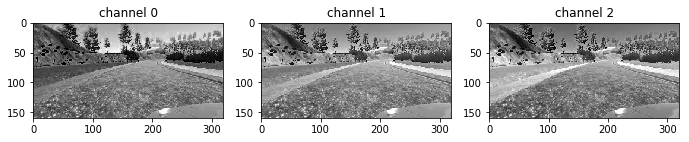

steering: 0.32594340099999997, idx: 145


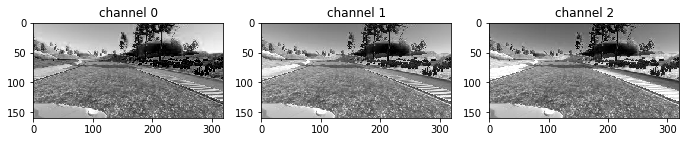

steering: -0.391037725, idx: 150


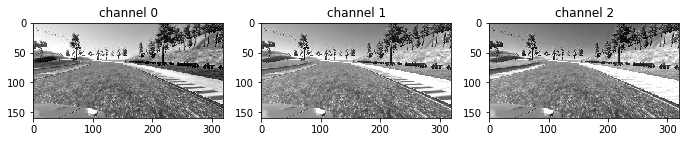

steering: -0.391037725, idx: 155


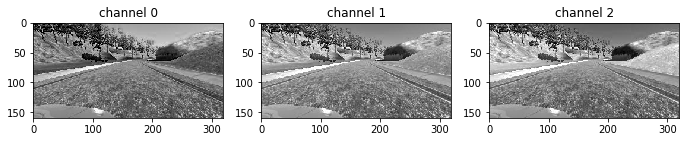

steering: -0.228301892, idx: 160


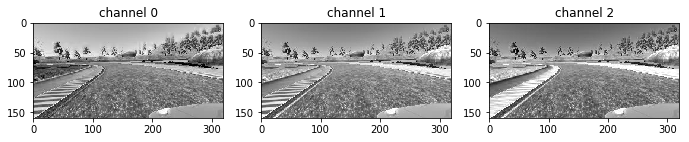

steering: 0.174056599, idx: 165


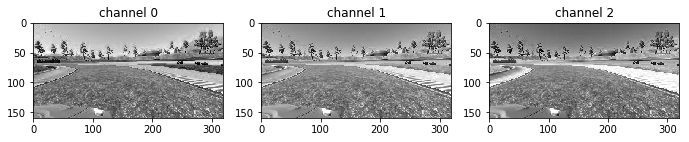

steering: -0.47783018, idx: 170


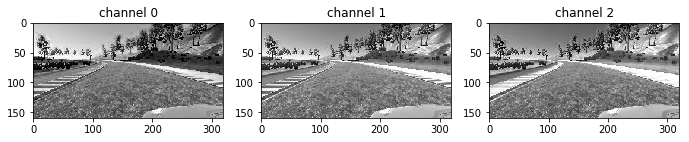

steering: 0.1849056645, idx: 175


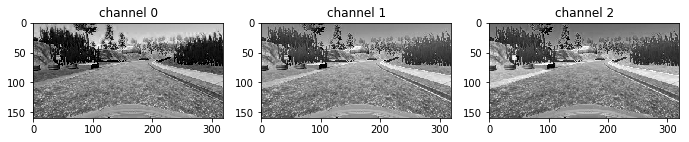

steering: 0.06603774, idx: 180


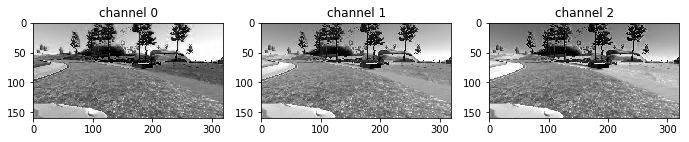

steering: -0.54292455, idx: 185


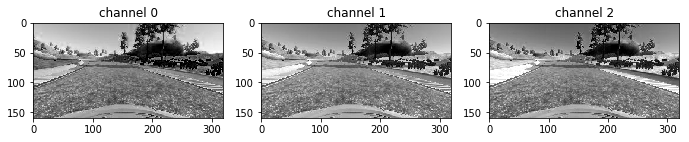

steering: -0.1226415, idx: 190


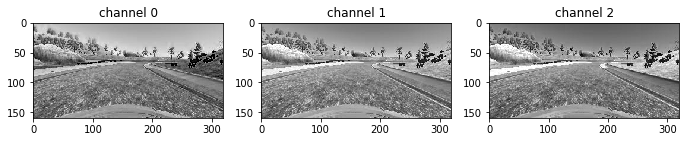

steering: -0.009433961999999999, idx: 195


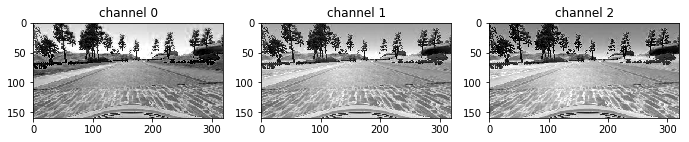

steering: 0.02830189, idx: 200


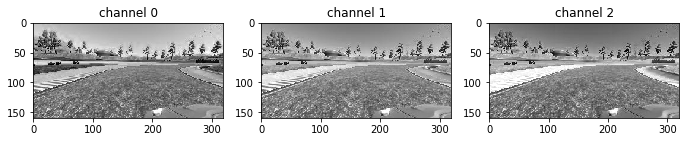

steering: 0.47783018, idx: 205


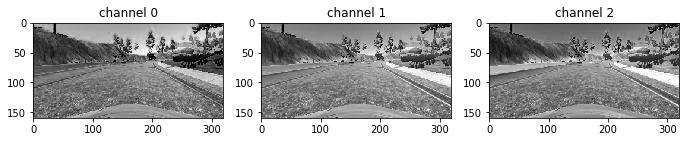

steering: 0.06603774, idx: 210


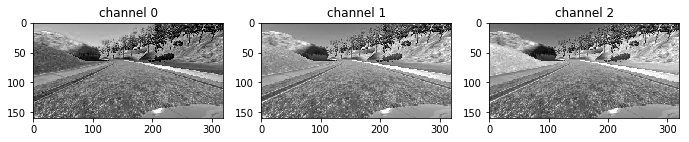

steering: 0.228301892, idx: 215


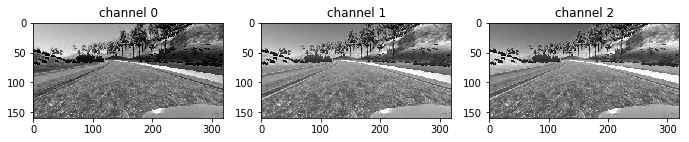

steering: 0.228301892, idx: 220


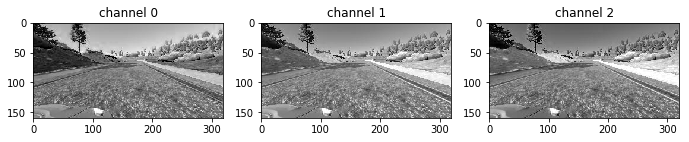

steering: -0.2066037725, idx: 225


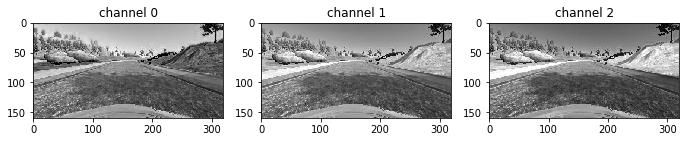

steering: -0.01886792, idx: 230


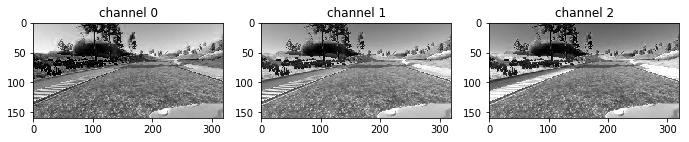

steering: 0.391037725, idx: 235


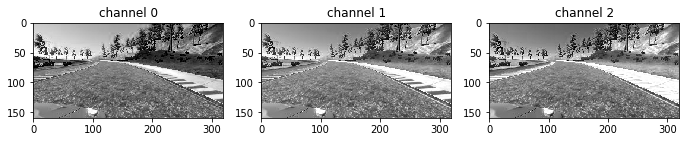

steering: -0.3150943355, idx: 240


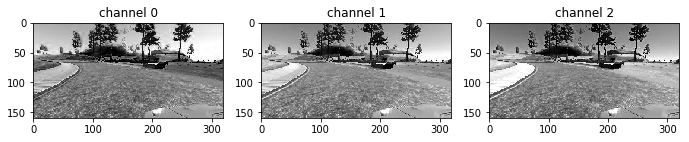

steering: -0.042924550000000006, idx: 245


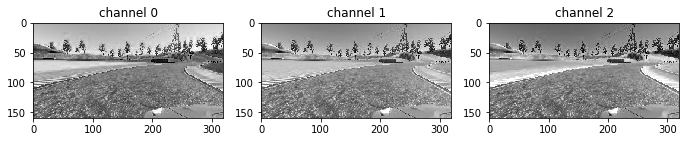

steering: 0.5863207199999999, idx: 250


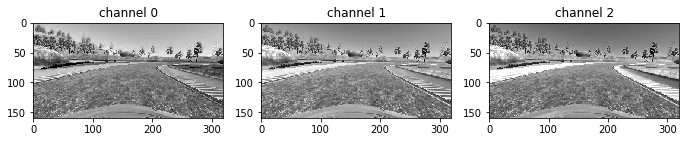

steering: 0.06603774, idx: 255


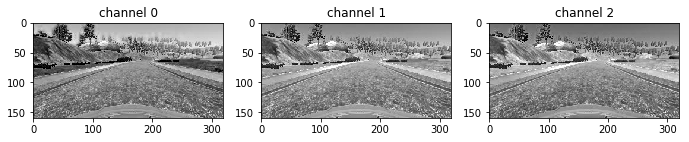

steering: 0.04716982, idx: 260


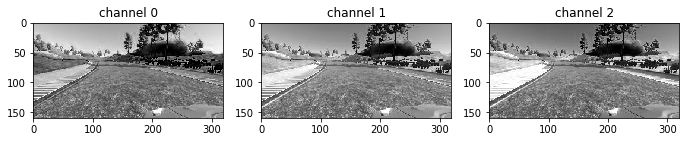

steering: 0.05471700500000004, idx: 265


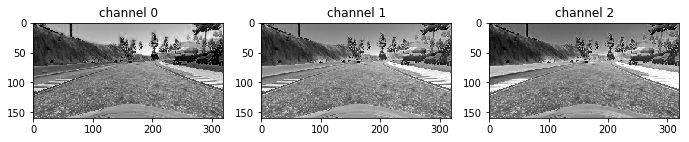

steering: 0.06603774, idx: 270


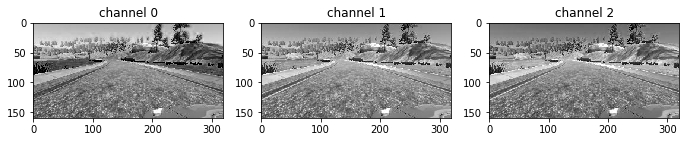

steering: 0.1849056645, idx: 275


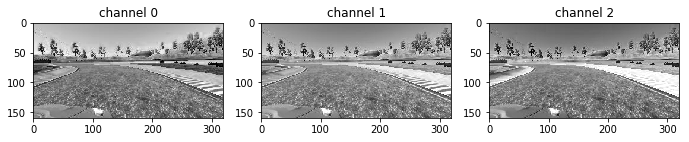

steering: -0.44528299499999996, idx: 280


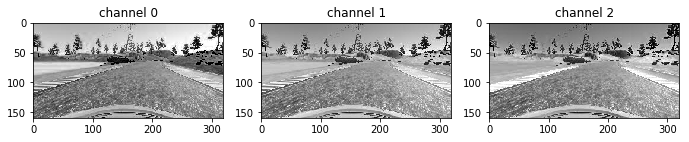

steering: 0.2358491, idx: 285


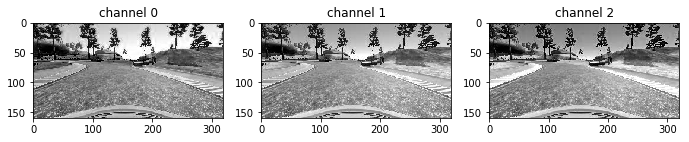

steering: -0.09433963, idx: 290


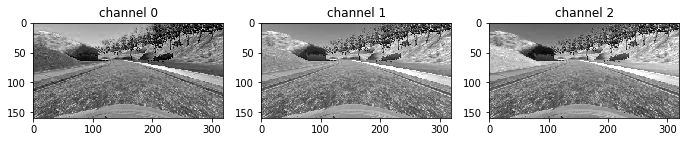

steering: -0.01886792, idx: 295
CPU times: user 49.9 s, sys: 39.1 s, total: 1min 29s
Wall time: 47.2 s


In [ ]:
import matplotlib

def plot_history_object(history_object):
    ### print the keys contained in the history object
    print(history_object.history.keys())

    ### plot the training and validation loss for each epoch
    plt.plot(history_object.history['loss'])
    plt.plot(history_object.history['val_loss'])
    plt.title('model mean squared error loss')
    plt.ylabel('mean squared error loss')
    plt.xlabel('epoch')
    plt.legend(['training set', 'validation set'], loc='upper right')
    plt.yscale('log')
    plt.show()

def visualise_dataset(image,label,steps):
    plt_num = 1
    print(image.shape)
    step_size = int(image.shape[0]/steps)
    for image_idx in range(0,image.shape[0],step_size):
        channels = image.shape[3]
        plt.figure(plt_num, figsize=(32,32))
        for channel in range(channels):
            plt.subplot(4,8, channel+1) # sets the number of feature maps to show on each row and column
            plt.title('channel ' + str(channel)) # displays the feature map number
            plt.imshow(image[image_idx,:,:, channel], interpolation="nearest", cmap="gray") # cmap="gist_earth_r"
        plt.show()
        print('steering: {1}, idx: {0}'.format(image_idx,label[image_idx],))

batch_x,batch_y = next(train_generator)
%time visualise_dataset(batch_x,batch_y,steps=60)


In [ ]:
from keras.models import Sequential,load_model
from keras.layers.core import Dense, Activation, Dropout, Reshape, Flatten, Lambda
from keras.layers.convolutional import Convolution2D, Cropping2D, SeparableConv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Merge
from keras.callbacks import EarlyStopping, ModelCheckpoint, LambdaCallback

import tensorflow as tf

# Hyperparameter Compile
loss= 'mse' # 'hinge'
optimizer= 'Nadam' #'Nadam' #'rmsprop'
# Hyperparameter Fit
rounds = 5
n_batches = len(df_train)//batch_size_single

nb_epoch= n_batches * rounds
batch_size = batch_size_single * 6
patience=5000

print('nb_epoch   \t: {:>5}'.format(nb_epoch))
print('batch_size \t: {:>5}'.format(batch_size))
print('patience   \t: {:>5}'.format(patience))

def model():
    model = Sequential()
    model.add(Cropping2D(cropping=((65,23), (0,0)), input_shape=image_shape)) #23
    #model.add(Lambda(lambda x: (x[:,:,:,0:1]+x[:,:,:,1:2]+x[:,:,:,2:3])/3)) ## drive on gray
    model.add(Lambda(lambda x: x/127.5 - 1.))
    output_shape = ((model.layers[-1].output_shape))
    model.add(Reshape((output_shape[1]*2,int(output_shape[2]/2),output_shape[3],)))
    a = 4
    model.add(Convolution2D(2**(a+0), 9, 9, subsample=(2, 2), border_mode="same", activation = 'elu'))
    model.add(Convolution2D(2**(a+1), 7, 7, subsample=(2, 2), border_mode="same", activation = 'elu'))
    model.add(Convolution2D(2**(a+2), 5, 5, subsample=(1, 1), border_mode="same", activation = 'elu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(2**(a+3), 3, 3, subsample=(2, 2), border_mode="same", activation = 'elu'))
    model.add(Convolution2D(2**(a+4), 3, 3, subsample=(2, 2), border_mode="same", activation = 'elu'))
    model.add(Convolution2D(2**(a+5), 3, 3, subsample=(1, 1), border_mode="same", activation = 'elu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())  
    model.add(Flatten())
    #model.add(Dropout(.66))
    model.add(Dense(4**4, activation = 'sigmoid'))
    model.add(Dense(3**3, activation = 'relu'))
    model.add(Dense(2**2, activation = 'linear'))
    model.add(Dense(1**1, activation = 'linear'))
    return model


try:
    #model = load_model('model.h5')
    model = model()
    print("model init done")
    model.load_weights("model.h5")
    #print("load_weights done")
except:
    print("load_weights failed")
    model = model()

model.summary()

%time model.compile(loss=loss, optimizer=optimizer)

losses = []
def plot_loss(epoch, logs):
    try:
        if(len(logs['loss'])>5):
            losses.append(logs['loss'])
            plt.plot(losses)
            plt.show()
    except:
        pass

def callbacks():
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience,verbose=0,)
    model_checkpoit = ModelCheckpoint('model.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
    plot_loss_callback = LambdaCallback(on_epoch_end=plot_loss)
    return [early_stopping,model_checkpoit,plot_loss_callback]

history_objects = []
while(1):
    history_object = model.fit_generator(generator         = train_generator, \
                        samples_per_epoch = batch_size*6, \
                        validation_data   = validation_generator, \
                        nb_val_samples    = 1, \
                        nb_epoch          = nb_epoch,\
                        callbacks         = callbacks() \
                                        )
    history_objects += history_object
    plot_history_object(history_object)

import winsound
winsound.Beep(130,10000)

Using TensorFlow backend.


nb_epoch   	:   820
batch_size 	:   300
patience   	:  5000
model init done
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
cropping2d_1 (Cropping2D)        (None, 72, 320, 3)    0           cropping2d_input_1[0][0]         
____________________________________________________________________________________________________
lambda_1 (Lambda)                (None, 72, 320, 3)    0           cropping2d_1[0][0]               
____________________________________________________________________________________________________
reshape_1 (Reshape)              (None, 144, 160, 3)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 72, 80, 16)    3904        reshape_1[0][0]                  
_______________

In [ ]:
import argparse
import base64
from datetime import datetime
import os
import shutil

import numpy as np
import socketio
import eventlet
import eventlet.wsgi
from PIL import Image
from flask import Flask
from io import BytesIO

from keras.models import load_model
import h5py
from keras import __version__ as keras_version

model = load_model('model.h5')
print("load_model done")

sio = socketio.Server()
app = Flask(__name__)
prev_image_array = None


class SimplePIController:
    def __init__(self, Kp, Ki):
        self.Kp = Kp
        self.Ki = Ki
        self.set_point = 0.
        self.error = 0.
        self.integral = 0.

    def set_desired(self, desired):
        self.set_point = desired

    def update(self, measurement):
        # proportional error
        self.error = self.set_point - measurement
        # integral error
        self.integral += self.error
        return self.Kp * self.error + self.Ki * self.integral

controller = SimplePIController(0.1, 0.002)
set_speed = 15
controller.set_desired(set_speed)

@sio.on('telemetry')
def telemetry(sid, data):
    if data:
        # The current steering angle of the car
        steering_angle = data["steering_angle"]
        # The current throttle of the car
        throttle = data["throttle"]
        # The current speed of the car
        speed = data["speed"]
        # The current image from the center camera of the car
        imgString = data["image"]
        image = Image.open(BytesIO(base64.b64decode(imgString)))
        image_array = np.asarray(image)
        steering_angle = float(model.predict(image_array[None, :, :, :], batch_size=1))
        throttle = controller.update(float(speed))
        print(steering_angle, throttle)
        send_control(steering_angle, throttle)
    else:
        # NOTE: DON'T EDIT THIS.
        sio.emit('manual', data={}, skip_sid=True)


@sio.on('connect')
def connect(sid, environ):
    print("connect ", sid)
    send_control(0, 0)

def send_control(steering_angle, throttle):
    sio.emit(
        "steer",
        data={
            'steering_angle': steering_angle.__str__(),
            'throttle': throttle.__str__()
        },
        skip_sid=True)

# wrap Flask application with engineio's middleware
app = socketio.Middleware(sio, app)

# deploy as an eventlet WSGI server
eventlet.wsgi.server(eventlet.listen(('', 4567)), app)


In [ ]:
'''
def get_StratifiedShuffleSplit(batches_idx,batch_size):
    n_bins  = 5
    batch_size = 5*7*7
    y_classes = df['steering'].copy()*n_bins//1
    batches_idx = df.index
    data_size = len(batches_idx)
    n_split = int(data_size//batch_size)-1
    print(n_split)
    batch_range = df.index
    sss = StratifiedShuffleSplit(n_splits = n_split,test_size = 15)
    batch_idx, val_idx = next(sss.split((batch_range),(y_classes.values)))
    
    batch_idx = batch_idx[:batch_size*n_split].reshape((n_split,batch_size, ))
    batch_idx = batch_idx[:batch_size*n_split].reshape((n_split,batch_size, ))
    
    return batch_idx, val_idx

    batch_idx, val_idx = (get_batch_idx(batches_idx,batch_size = 256))
    batch_idx.shape
    
    #from keras.layers.recurrent import LSTM, GRU, SimpleRNN
#from keras.layers.wrappers import TimeDistributed
#from keras.regularizers import l2, activity_l2


'''